# Exploratory Data Analysis

### 사용 라이브러리

In [278]:
import pandas as pd
import numpy as np
from libs.lib import get_file_dir 

# 그래프 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib.pyplot import style

# 스타일 설정
style.use('seaborn')

# 한글 폰트 설정
if (platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 음수(-)가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False 

## 일반폐기물재활용률(10-19)

### 1.0 데이터 불러오기

In [337]:
df = pd.read_csv(get_file_dir('refined','일반폐기물재활용률(10-19).csv'))

### 2.0 데이터 탐색 및 전처리

In [338]:
df.info() 

# Not-null, 2520 ROW

# 행정구역별(1), (2)          object
# year (연도)             int64
# 일반폐기물재활용률(%)      object -> float
# 총재활용량(톤/일)         object -> float
# 생활폐기물총발생량(톤/일)  object -> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   행정구역별(1)   2340 non-null   object
 1   행정구역별(2)   2340 non-null   object
 2   year       2340 non-null   int64 
 3   일반폐기물재활용률  2340 non-null   object
 4   총재활용량      2340 non-null   object
 5   생활폐기물총발생량  2340 non-null   object
dtypes: int64(1), object(5)
memory usage: 109.8+ KB


##### 결측치 탐색 및 처리

In [340]:
# 실질적 결측치 처리

df['일반폐기물재활용률'].unique() # '-' 값 존재 (실질적 결측치) 

condition = df['일반폐기물재활용률'] == '-'

print(len(df[condition])) 

df.replace('-', np.nan, inplace=True) # '-' 널값으로 대치

54


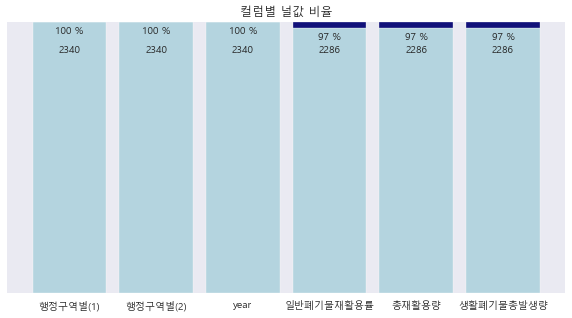

In [341]:
# 결측치 탐색 - 널값 비율 그래프

# Data
row = [0,1,2,3,4,5] # for X row

null_dict = {'notnull': [df['행정구역별(1)'].count(), df['행정구역별(2)'].count(), df['year'].count(), 
                          df['일반폐기물재활용률'].count(), df['총재활용량'].count(), df['생활폐기물총발생량'].count()],
              'isnull' : [df['행정구역별(1)'].isnull().sum(), df['행정구역별(2)'].isnull().sum(), df['year'].isnull().sum(),
                          df['일반폐기물재활용률'].isnull().sum(), df['총재활용량'].isnull().sum(), df['생활폐기물총발생량'].isnull().sum()]}

null_df = pd.DataFrame(null_dict)
 
# From raw value to percentage
data_totals = [i+j for i,j in zip(null_df['notnull'], null_df['isnull'])]
data_notnull = [i / j * 100 for i,j in zip(null_df['notnull'], data_totals)]
data_isnull = [i / j * 100 for i,j in zip(null_df['isnull'], data_totals)]
 
# plot
plt.figure(figsize=(10, 5))
barWidth = 0.85

# Create train bars
plot1 = plt.bar(row, data_notnull, color='#B4D4DF', edgecolor='white', width=barWidth)
plt.bar(row, data_isnull, bottom=data_notnull, color='#11117A', edgecolor='white', width=barWidth)


# Custom x axis
names = ('행정구역별(1)','행정구역별(2)','year','일반폐기물재활용률','총재활용량', '생활폐기물총발생량')
plt.xticks(row, names)

for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             0.95*height,'%d %%' % int(height), ha='center', va='bottom')

i = 0
for value in plot1:
    data_value = null_df['notnull'][i]
    plt.text(value.get_x() + value.get_width()/2.,
             0.90*height,'%d' % int(data_value), ha='center', va='bottom')
    i += 1

# Hide spines and ticks
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)

# Title
plt.title("컬럼별 널값 비율")

# Show graphic
plt.show()

In [342]:
# 모두 동일한 ROW에 54개 존재: 신설된 시군구로 인해 결즉치 발생 추측

# 결측치 정책: 0으로 대치

df.fillna(0, inplace=True)

df.isnull().sum()

행정구역별(1)     0
행정구역별(2)     0
year         0
일반폐기물재활용률    0
총재활용량        0
생활폐기물총발생량    0
dtype: int64

##### 데이터 타입 변환

In [343]:
# 자료형 변환

df['year'] = df['year'].astype('object')

df['일반폐기물재활용률'] = df['일반폐기물재활용률'].astype('float')

df['총재활용량'] = df['총재활용량'].astype('float')

df['생활폐기물총발생량'] = df['생활폐기물총발생량'].astype('float')

##### 기술통계

In [344]:
# 기술통계

df_describe = df.describe()
df_describe.loc['median'] = df[df['year']==2010].median() # 중앙값 추가
df_describe

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,2340.000000,2340.000000,2340.000000
mean,53.035000,131.879444,220.013974
std,18.476864,139.294137,216.906115
min,0.000000,0.000000,0.000000
25%,42.400000,23.900000,53.775000
50%,55.500000,89.250000,165.900000
75%,66.025000,199.675000,315.175000
max,100.000000,1105.800000,1526.900000
median,56.650000,86.050000,167.700000


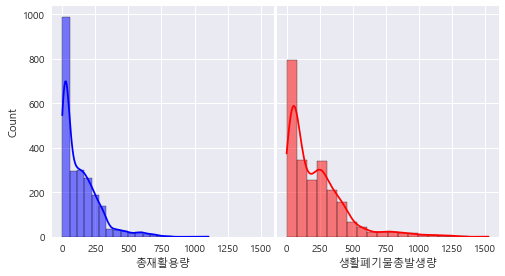

In [380]:
# 총재활용량, 생활폐기물총발생량 히스토그램

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
sns.histplot(data=df, x="총재활용량", kde=True, color="blue", ax=axes[0], bins=20)
sns.histplot(data=df, x="생활폐기물총발생량", kde=True, color="red", ax=axes[1], bins=20)
fig.subplots_adjust(top=0.925, wspace=0.01)
plt.show()

In [350]:
def get_describe(year):
    df_describe = df[df['year']==year].describe()
    df_describe.loc['median'] = df[df['year']==year].median() # 중앙값 추가
    return df_describe

get_describe(2010)

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,234.000000,234.000000,234.000000
mean,53.533761,126.912821,209.741453
std,16.506228,134.059860,205.994825
min,0.000000,0.000000,0.000000
25%,44.375000,22.975000,48.350000
50%,56.650000,86.050000,167.700000
75%,65.975000,181.325000,298.050000
max,90.400000,720.100000,1199.600000
median,56.650000,86.050000,167.700000


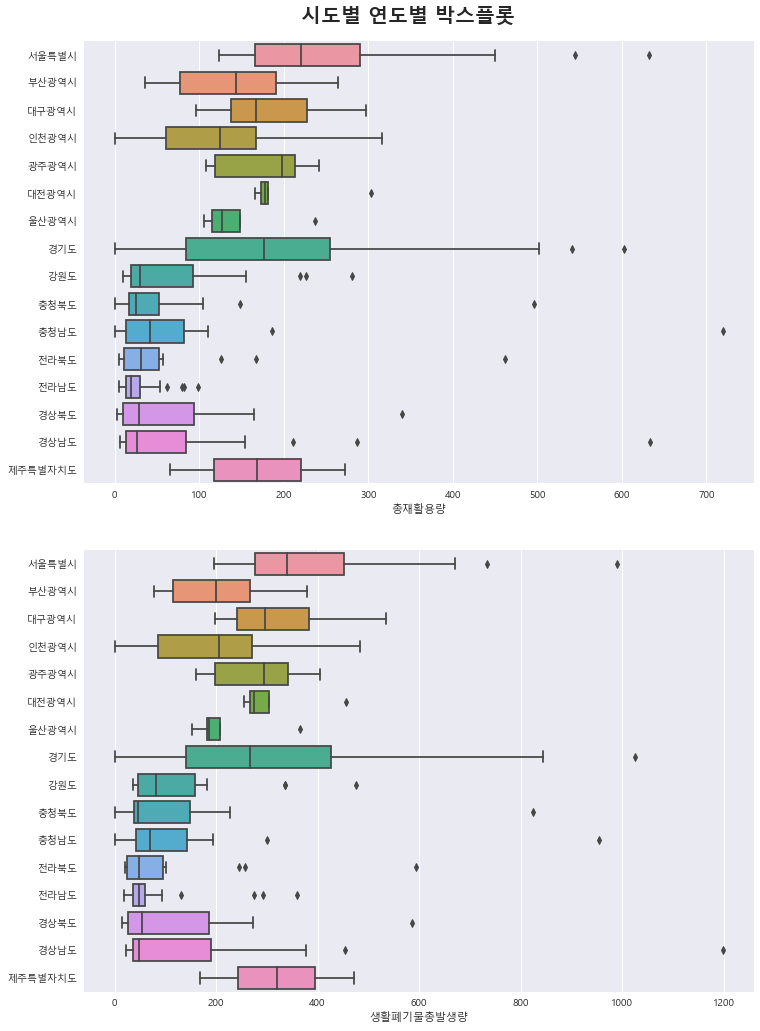

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
count,234.000000,234.000000,234.000000
mean,53.533761,126.912821,209.741453
std,16.506228,134.059860,205.994825
min,0.000000,0.000000,0.000000
25%,44.375000,22.975000,48.350000
50%,56.650000,86.050000,167.700000
75%,65.975000,181.325000,298.050000
max,90.400000,720.100000,1199.600000


In [400]:
# 시도별 연도별 박스플롯

def get_box_plot(year):
    fig, axes = plt.subplots(2, 1, figsize=(12,16))
    sns.boxplot(x='총재활용량', y='행정구역별(1)', data=df[df['year']==year], ax = axes[0])
    sns.boxplot(x='생활폐기물총발생량', y='행정구역별(1)', data=df[df['year']==year], ax = axes[1])
    plt.suptitle('시도별 연도별 박스플롯', fontsize=20, weight='bold')
    fig.subplots_adjust(top=0.95, hspace=0.15)
    
    for ax in axes:
        ax.set(ylabel=None)

    plt.show()
    return df[df['year']==year].describe()

get_box_plot(2010)


##### 이상치 탐색

### 3.0 시각적 EDA

In [287]:
# 상관관계 탐색

df.corr()

# 생활폐기물총발생량과 총재활용량은 뚜렷한 상관관계를 가짐.
# 일반폐기물재활용률 = 생활폐기물총발생량 / 총재활용량

,일반폐기물재활용률,총재활용량,생활폐기물총발생량
일반폐기물재활용률,1.000000,0.498241,0.379290
총재활용량,0.498241,1.000000,0.972267
생활폐기물총발생량,0.379290,0.972267,1.000000


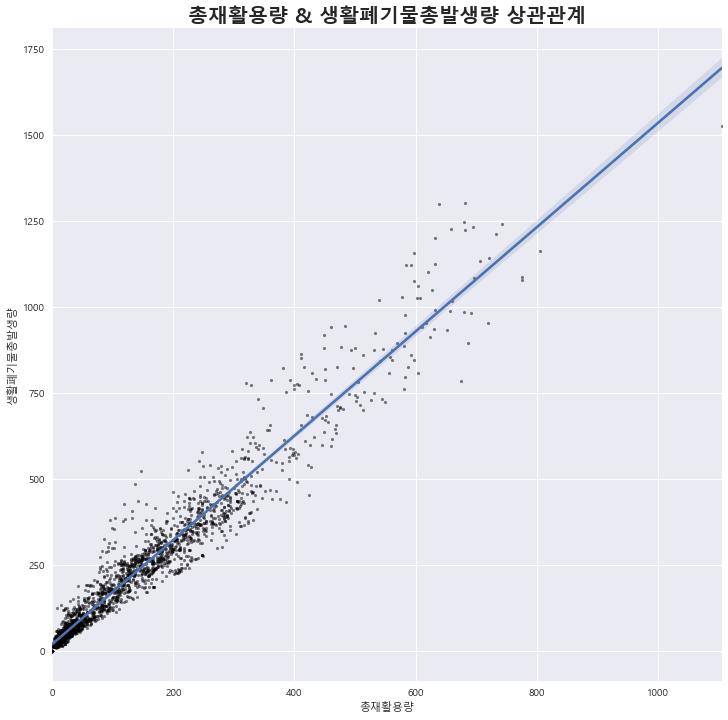

In [384]:
# 데이터 분포 - 총재활용량 & 생활폐기물총발생량 상관관계

plt.figure(figsize=(12, 12))

sns.regplot(x=df["총재활용량"], y=df["생활폐기물총발생량"], fit_reg=True, scatter_kws={"color":'black',"alpha":0.5,"s":10})

plt.title('총재활용량 & 생활폐기물총발생량 상관관계', fontsize=20, weight='bold')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.show()

##### 시도별 연도별 추세

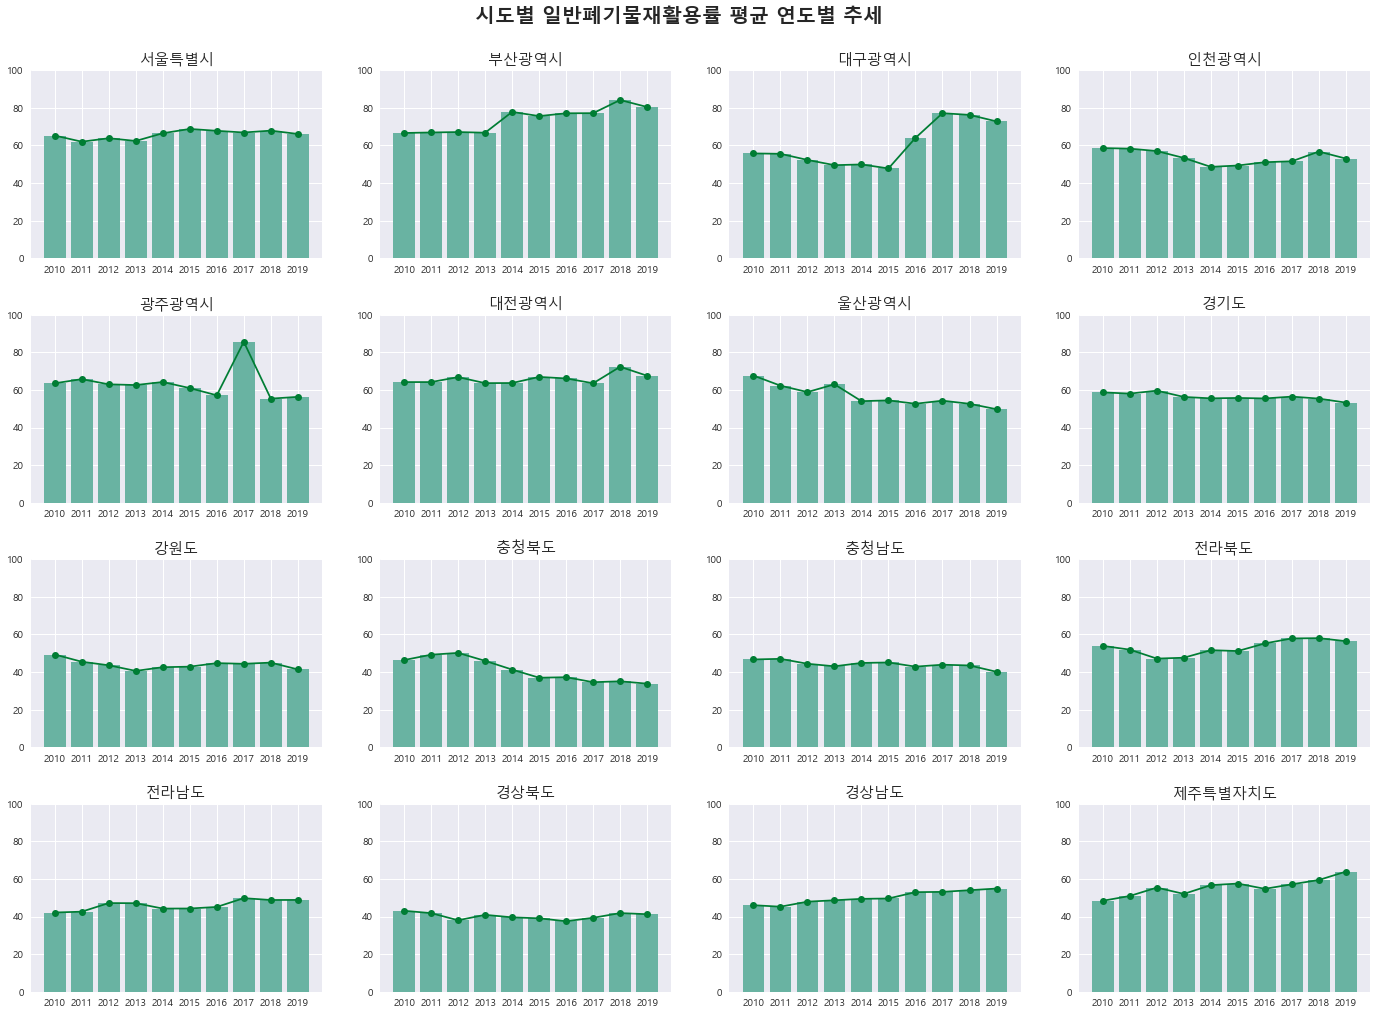

In [284]:
# 시도별 평균 일반폐기물재활용률 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['일반폐기물재활용률'], color='#69b3a2')
    axs[ax, ay].plot(df_temp['year'], df_temp['일반폐기물재활용률'], color='#007d34', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].set_yticks(list(range(0, 101, 20)))
    axs[ax, ay].set_xticks(list(df['year'].unique()))
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

plt.suptitle('시도별 일반폐기물재활용률 평균 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

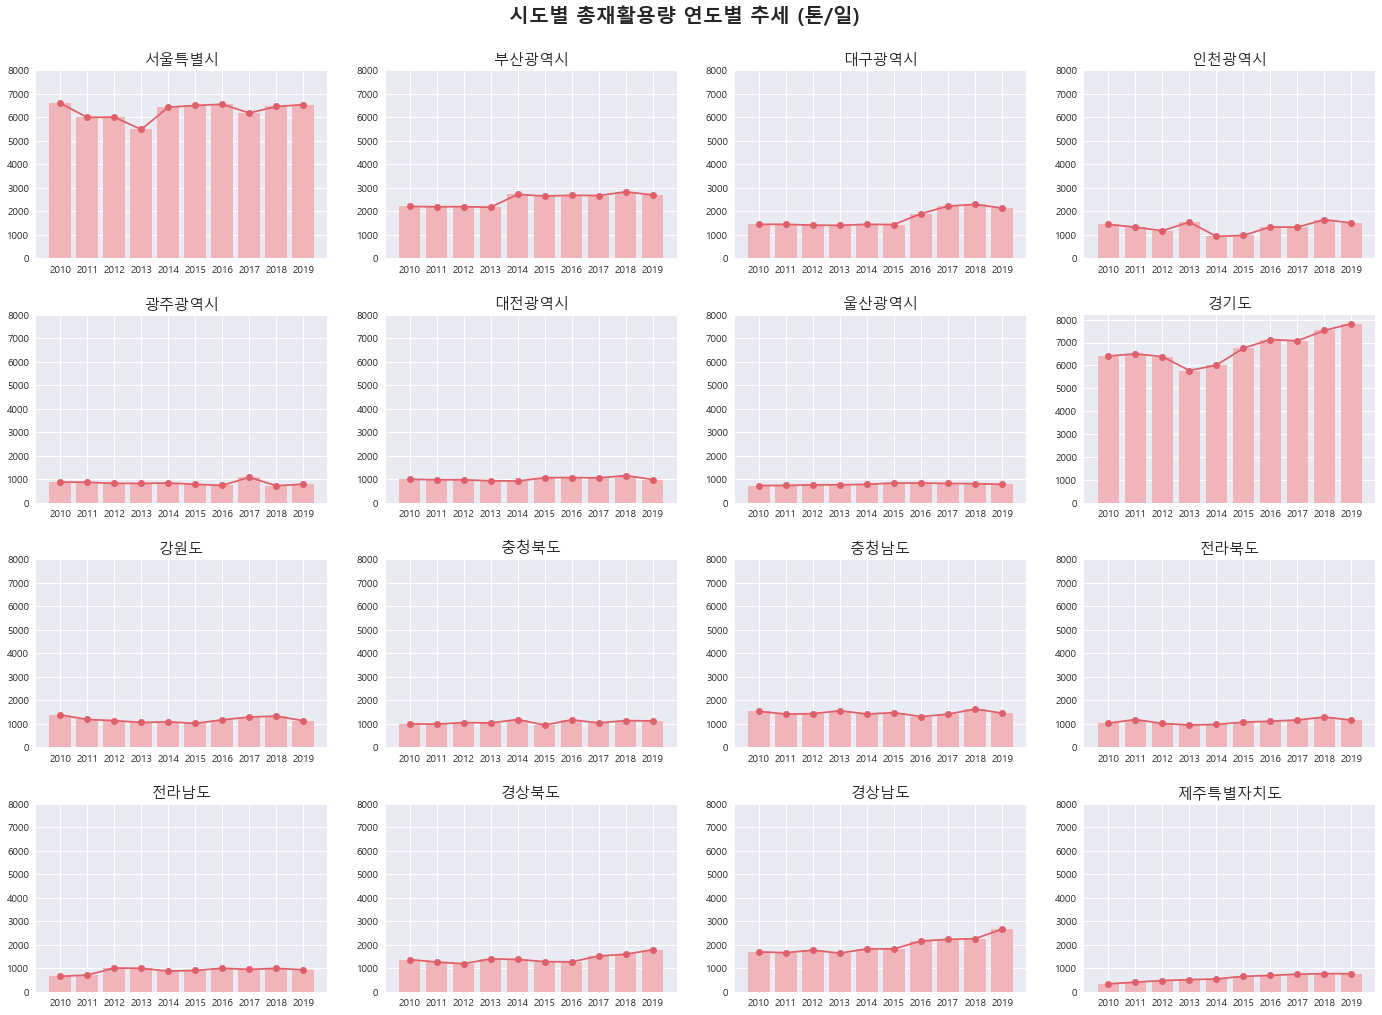

In [283]:
# 시도별 총재활용량 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['총재활용량'], color='#f0b5ba')
    axs[ax, ay].plot(df_temp['year'], df_temp['총재활용량'], color='#df5f6a', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 8001, 1000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 총재활용량 연도별 추세 (톤/일)', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

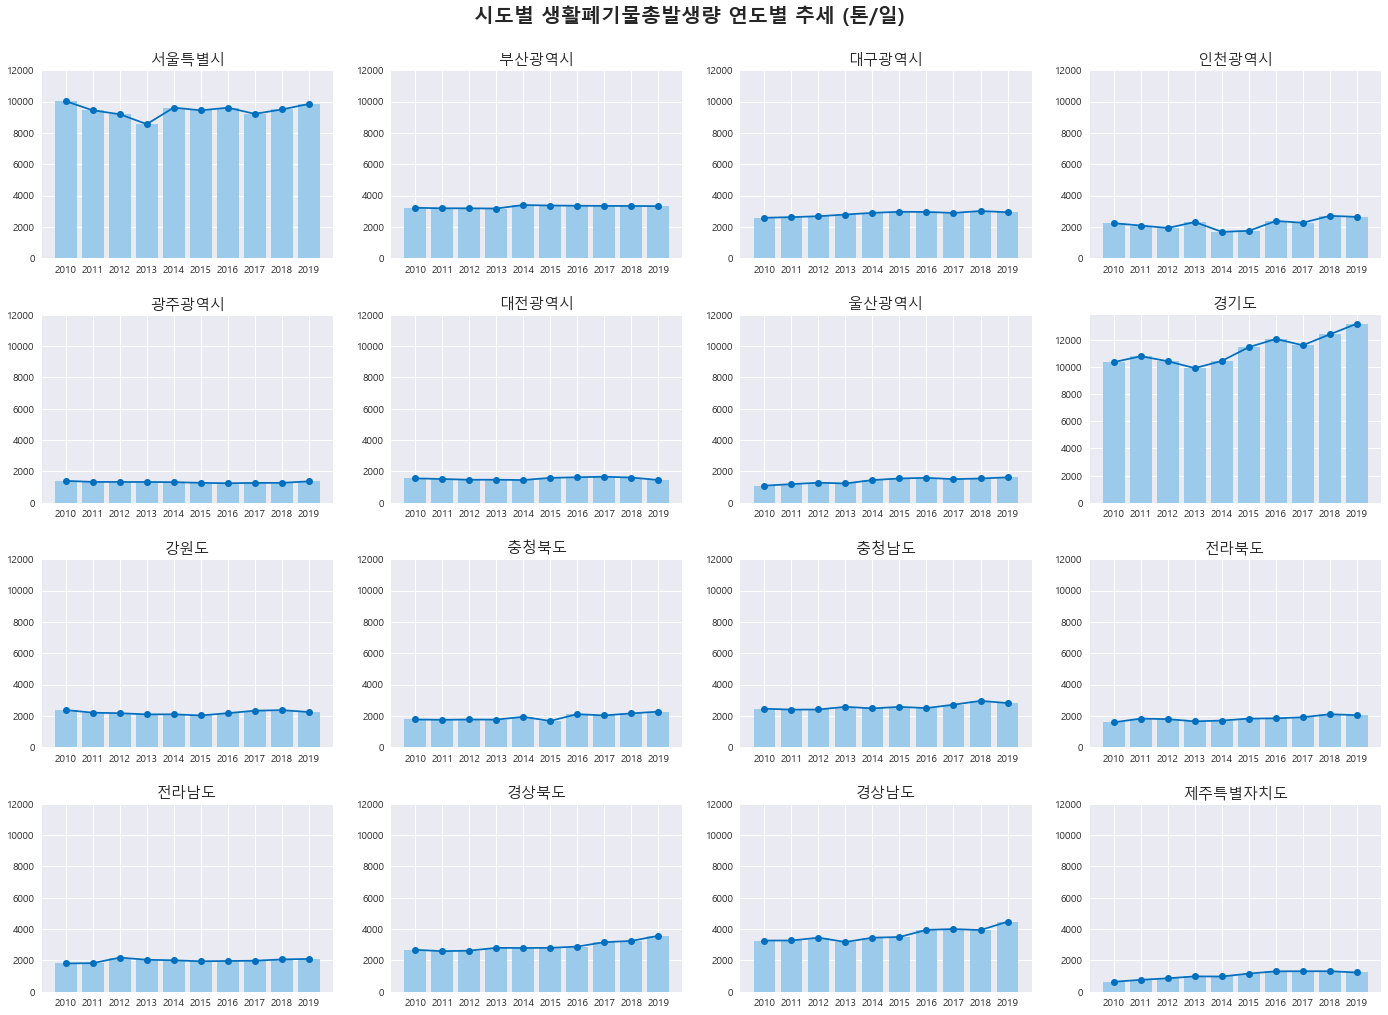

In [285]:
# 시도별 생활폐기물총발생량 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률', '총재활용량', '생활폐기물총발생량']].sum().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].bar(df_temp['year'], df_temp['생활폐기물총발생량'], color='#9bcaeb')
    axs[ax, ay].plot(df_temp['year'], df_temp['생활폐기물총발생량'], color='#006fbe', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 14000, 2000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 생활폐기물총발생량 연도별 추세 (톤/일)', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()

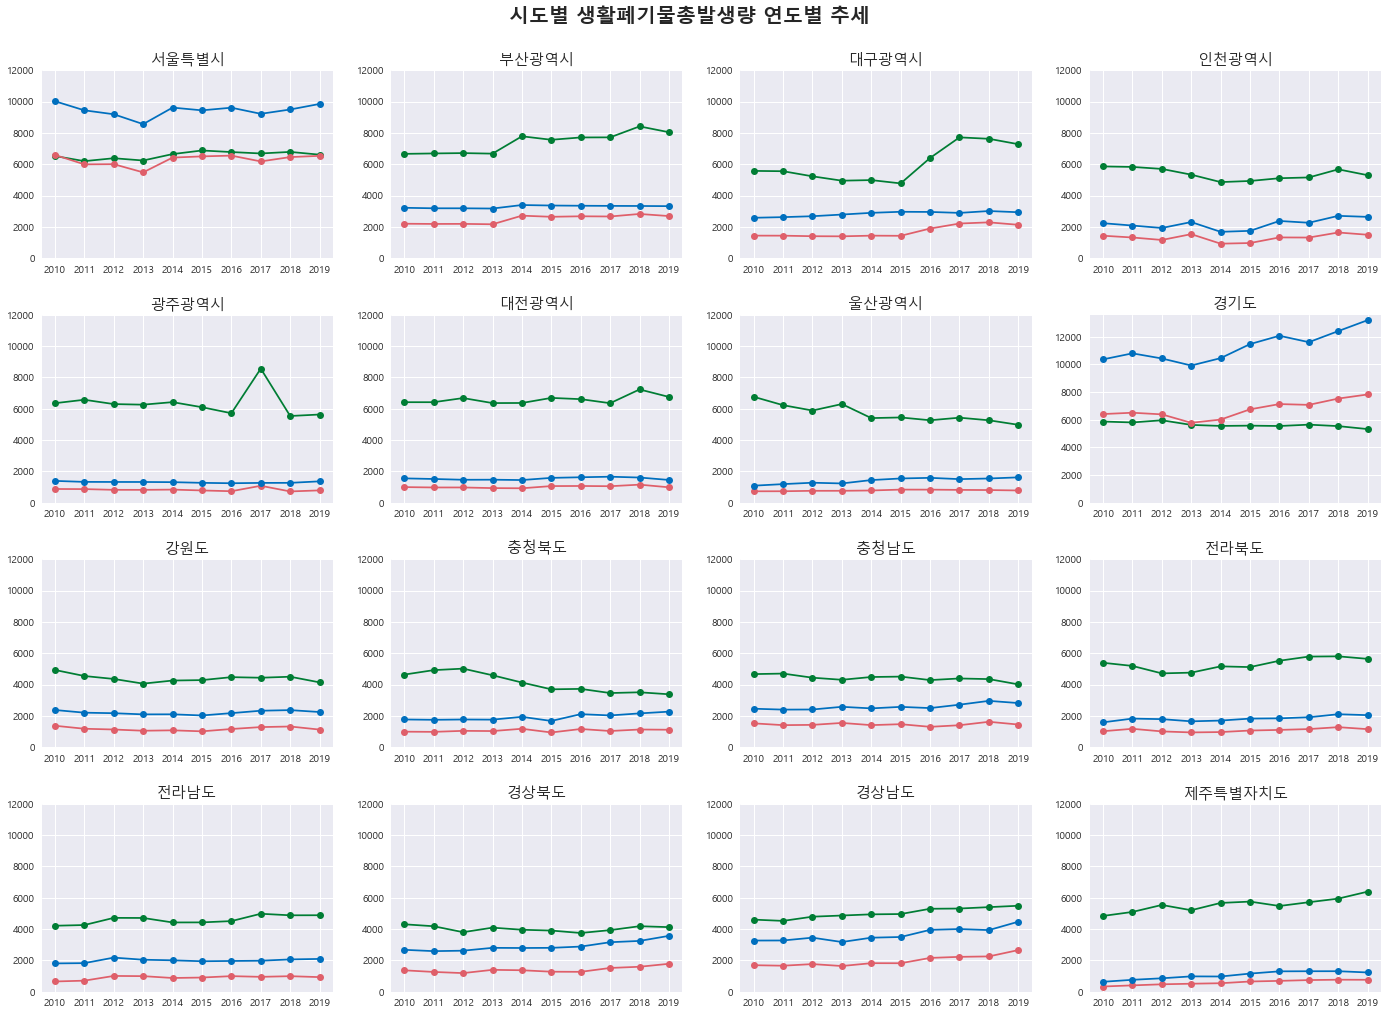

In [282]:
# 시도별 '일반폐기물재활용률', '총재활용량', '생활폐기물총발생량' 연도별 추세

fig, axs = plt.subplots(4, 4, figsize=(24, 16))

ax, ay = 0, 0

for i in df['행정구역별(1)'].unique():
    sido_condition = df['행정구역별(1)']== i
    df_temp_1 = df[sido_condition].groupby(df['year'])[['총재활용량', '생활폐기물총발생량']].sum().reset_index()
    df_temp_2 = df[sido_condition].groupby(df['year'])[['일반폐기물재활용률']].mean().reset_index()

    if ay==4:
        ax+=1
        ay=0
    axs[ax, ay].plot(df_temp_2['year'], df_temp_2['일반폐기물재활용률']*100, color='#007d34', marker='o')
    axs[ax, ay].plot(df_temp_1['year'], df_temp_1['총재활용량'], color='#df5f6a', marker='o')
    axs[ax, ay].plot(df_temp_1['year'], df_temp_1['생활폐기물총발생량'], color='#006fbe', marker='o')
    axs[ax, ay].set_title('{}'.format(i), fontsize=15)
    axs[ax, ay].spines['top'].set_visible(False)
    axs[ax, ay].spines['right'].set_visible(False)
    axs[ax, ay].tick_params(bottom=False)
    ay+=1

for sax in axs.flat:
    sax.set_yticks(list(range(0, 14000, 2000)))
    sax.set_xticks(list(df['year'].unique()))

plt.suptitle('시도별 생활폐기물총발생량 연도별 추세', fontsize=20, weight='bold')
fig.subplots_adjust(top=0.925, hspace=0.3)
plt.show()